<a href="https://colab.research.google.com/github/tronghieu2810/DEEP-LEARNING/blob/main/UDEMY/%5BMike_X_Cohen%5D_Deep_understanding/autoencoders/DUDL_autoenc_denoisingMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For DL modeling
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn

# For number-crunching
import numpy as np
import scipy.stats as stats

# For dataset management
import pandas as pd
from sklearn.model_selection import train_test_split

# For data visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns

# For timing computations
import time

import copy

import sklearn.metrics as skm

# Import and process the data

In [2]:
# Import dataset
mnist_dataset = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'), delimiter=',')

#Extract labels (number IDs) and remove from data
labels = mnist_dataset[:, 0]
data   = mnist_dataset[:, 1:]

# Normalize the data to a range of [0, 1]
data_norm = data / np.max(data)

# Convert to tensor
data_tensor   = torch.tensor(data_norm).float()

# Create the DL model

In [3]:
# Create a class for the model
def create_the_MNIST_AE():
    class ae_net(nn.Module):
        def __init__(self):
            super().__init__()

            # Input layer
            self.input = nn.Linear(784, 250)

            # Encoder layer
            self.enc = nn.Linear(250, 50)

            # Latent layer
            self.lat = nn.Linear(50, 250)

            # Decoder layer
            self.dec = nn.Linear(250, 784)
    
        # Forward pass
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.enc(x))
            x = F.relu(self.lat(x))
            y = torch.sigmoid(self.dec(x))

            return y
    
    # Create the model instance
    net = ae_net()

    # Loss function
    loss_func = nn.MSELoss()

    # Optimizer
    optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

    return net, loss_func, optimizer

In [4]:
# Test the model with a bit of data
net, loss_func, optimizer = create_the_MNIST_AE()

X     = data_tensor[:5, :]
y_hat = net(X)

print(X.shape)
print(y_hat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


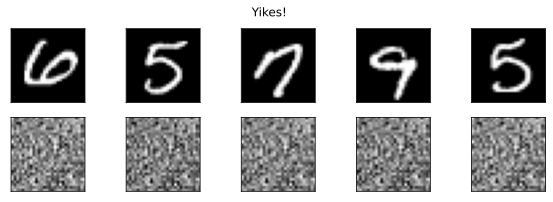

In [5]:
# See what the model did
fig, axs = plt.subplots(2, 5, figsize=(10, 3))

for i in range(5):
    axs[0, i].imshow(X    [i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(y_hat[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])

plt.suptitle('Yikes!')
plt.show()

# Create a function that trains the model

In [8]:
def train_the_model():
    """
    AUTOENCODER_DENOISING_MNIST
    """

    num_epochs = 10000

    # Create a new model
    net, loss_func, optimizer = create_the_MNIST_AE()

    # Initialize losses
    losses = torch.zeros(num_epochs)

    # Loop over epochs
    for epoch_i in range(num_epochs):

        # Select a random set of images
        random_idx = np.random.choice(data_tensor.shape[0], size=32)
        X          = data_tensor[random_idx, :]

        # Forward pass and loss
        y_hat = net(X)
        loss  = loss_func(y_hat, X)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Losses in this epoch
        losses[epoch_i] = loss.item()
    
    # End epochs
    # Function output
    return losses, net

# Run the model and show the results!

Final loss: 0.0058


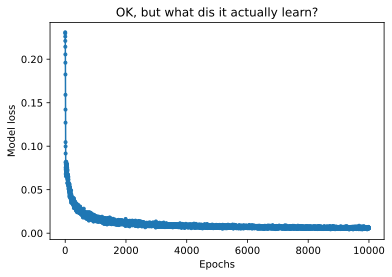

In [9]:
# Train the model
losses, net = train_the_model()
print(f'Final loss: {losses[-1]:.4f}')

# Visualize the losses
plt.plot(losses, '.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what dis it actually learn?')
plt.show()

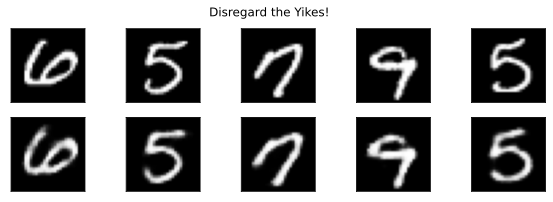

In [10]:
# Repeat the visualization when testing the model
X     = data_tensor[:5, :]
y_hat = net(X)

# See what the model did
fig, axs = plt.subplots(2, 5, figsize=(10, 3))

for i in range(5):
    axs[0, i].imshow(X    [i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(y_hat[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])

plt.suptitle('Disregard the Yikes!')
plt.show()

# Add noise to see a use case of an autoencoder

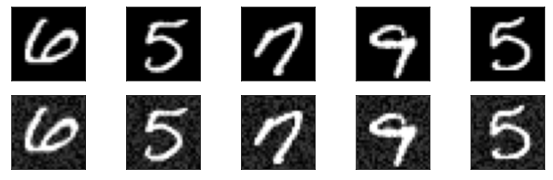

In [11]:
# Grab a small set of images
X = data_tensor[:10, :]

# Add noise
X_noise = X + torch.rand_like(X) / 4

# Clip at 1
X_noise[X_noise > 1] = 1

# Show the noisy image
fig, axs = plt.subplots(2, 5, figsize=(10, 3))

for i in range(5):
    axs[0, i].imshow(X      [i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(X_noise[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])

plt.show()

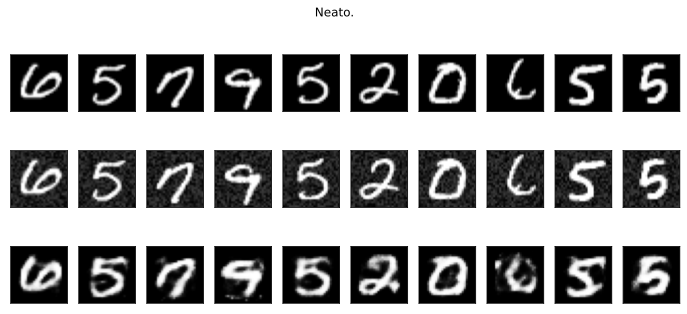

In [12]:
# Run through the model
Y = net(X_noise)

fig, axs = plt.subplots(3, 10, figsize=(12, 5))

for i in range(10):
    axs[0, i].imshow(X      [i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(X_noise[i, :].view(28, 28).detach(), cmap='gray')
    axs[2, i].imshow(Y      [i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])
    axs[2, i].set_xticks([]), axs[2, i].set_yticks([])

plt.suptitle('Neato.')
plt.show()

# Additional explorations

In [13]:
# 1) Because these are continuous data, mean-squared-error is the correct loss function. But I mentioned in the previous 
#    video that binary cross-entropy loss is *sometimes* used in autoencoders. Does the loss function make a difference
#    for this problem? Why?
# 
# 2) Change the number of units in the latent layer to 10. How does that affect the loss and denoising? Don't turn this 
#    into a full parametric experiment -- that's for the next video!
# 
# 3) The code here picks samples randomly, which means many samples are skipped, and some could be repeated. Change the 
#    code so that the model goes through every item exactly once per epoch. The order should be randomized to avoid 
#    possible order effects. You'll probably want to reduce the number of epochs!
# 
# 4) Is it necessary to normalize the data to a range of [0 1]? What are arguments for normalization, and arguments why
#    it may not be critical (in this problem)?
# 
# 5) The autoencoder did a pretty decent job at denoising the images. How far can you push this? Try adding more noise
#    to the images and re-running the test code (you don't need to retrain the model). Is the autoencoder robust to a
#    a larger amount of noise?
# 